# Linear Models


## Definition and intuition

Linear models are widely used in many industries because its mathematical foundations have been mastered for a long time by people tackling quantitative problems. These models learn a linear and monotonic function, meaning that for a change in any given input (a feature), the output response function changes at a defined rated, in only one direction, and at a magnitude represented by a readable coefficient. As such, linear models are interpretable since  we can easily deduce the contribution of a feature by looking at its coefficient in the model.

Howerver, linear models also come with some assumptions that make them easy to use and interpret but which are often not satisfied in reality:
+ Linear relationship
+ Multivariate normality
+ No or little multicollinearity
+ No auto-correlation
+ Homoscedasticity (constant variance)

A more background on linear models can be find at [Interpretable Machine Learning book by Christoph Molnar](https://christophm.github.io/interpretable-ml-book/limo.html)

## Linear models and interpretability

Linear models are often the first thing that comes to mind when we talk about interpretability and are probably the most known class of "white box" model.

As stated in [Interpretable Machine Learning book by Christoph Molnar](https://christophm.github.io/interpretable-ml-book/limo.html), linearity and monotonicity enable intuitive reasoning about predictions as we can use the coefficients that we found to explain the model. The interpretation of a coefficient in the linear model depends on the type of the corresponding feature:

+ Numerical: for an increase of a numerical feature by one unit, the estimated outcome changes, on average, by its coefficient
+ Binary: A feature, that takes on one of two possible values, a change of the feature from the reference level to the other changes the outcome, on average, by its coefficient.
+ Categorical: to deal with multiple categories we can one-hot code them, and then the interpretation for each level is  according to the binary features

It is worth noting that the interpretation of the intercept, noted by β<sub>0</sub> is usually not relevant unless the features were standardised (mean of zero, standard deviation of one), where the intercept reflects the predicted outcome of an instance where all features are at their mean.

### Characteristics of  this interpretability method
- <b>Model-Specific</b>: we are bound to using linear models
- <b>Global</b>: by looking at the coefficients we can get a global idea of what the model is doing
- <b>Local</b>: for one instance we can see how much each feature actually contributes to the final result by applying the formula: <em>contribution<sub>{feature}</sub> = coefficient<sub>{feature}</sub> * value<sub>{feature}</sub></em> 

### Guidance on how to read this notebook

In this notebook we will check linear models' interpretability for regression tasks. For classification, please check out the notebook <a href=Logistic_Regression.ipynb>Logistic regression</a>. 

We will interpret at both scopes, global and local. Finally, we will add LASSO and Ridge penalization and compare their effect on interpretability. 


* <a href=#lr>Regression with bike sharing dataset</a>  
    * <a href=#lrnone> Linear regression without penalization </a>
        * <a href=#lrnonem> Model creation and sanity checks </a>
        * <a href=#lrnoneg> Global explanation </a>
        * <a href=#lrnonel> Local explanation </a>
    * <a href=#lrlasso> Linear regression with lasso penalization </a>       
        * <a href=#lrlassom> Model creation and sanity checks </a>
        * <a href=#lrlassog> Global explanation </a>
        * <a href=#lrlassol> Local explanation </a>
    * <a href=#lrridge> Linear regression with ridge penalization </a>
        * <a href=#lrridgem> Model creation and sanity checks </a>
        * <a href=#lrridgeg> Global explanation </a>
        * <a href=#lrridgel> Local explanation </a>
    * <a href=#lrc>Conclusions </a>
        

## Importations

In [1]:
import sklearn as sk
import pandas as pd

# Importing Bike Sharing dataset
from mlinutils.datasets import Bikes

# Libraries specific to Linear models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler

import mlinutils.linear_model_plots as lmp
import mlinutils.sanity as san

In [2]:
#  make plot outputs appear and be stored within the notebook
%matplotlib inline

## Load Bike Sharing data set

### Data description

Throughout the notebook we will be using the Bike Sharing data set which records daily counts of bike rentals from the bike sharing company Capital-Bikeshare in Washington D.C. The full description of the data set is available separately and can be found here: <a href="bike_sharing_dataset.ipynb">See bike sharing dataset exploration</a> 

### Data importation 

In [3]:
bikes = Bikes()
bk_X_train, bk_X_test, bk_y_train, bk_y_test = bikes.load()

### Data preview
Take a peak into the data we'll be using !

In [4]:
bikes.preview()

This dataset contains 17379 instances with 14 attributes


,season,year,month,hour,holiday,week_day,working_day,weather_situation,temperature,felt_temperature,humidity,wind_speed,count,days_since_2011
8718,spring,1.0,January,9pm-5am,0.0,Wednesday,1.0,Good,0.82,0.760,34.0,19.0012,1.0,368.0
461,spring,0.0,January,6am-10am,0.0,Friday,1.0,Good,9.02,10.605,55.0,16.9979,27.0,20.0
1770,spring,0.0,March,11am-4pm,0.0,Saturday,0.0,Good,18.86,22.725,36.0,30.0026,196.0,77.0
4243,fall,0.0,June,5pm-8pm,0.0,Thursday,1.0,Good,31.98,34.090,27.0,23.9994,594.0,180.0
7287,winter,0.0,November,6am-10am,0.0,Saturday,0.0,Good,10.66,12.120,60.0,16.9979,23.0,308.0


### Regression with bike sharing dataset <a name=lr>

### Linear regression without regularization <a name=lrnone>

##### Building the model<a name=lrnonem>

Here we will fit a very simple ordinary least squares linear regressor with all input variables as predictors. Although our data set does not respect the linear assumption (multivariate normality, no or little multicollinearity, etc), we try to assess the accuracy of the final model and extract some level of interpretability.

Moreover, when fitting a linear regression, it is often recommended to standardize/normalize input variables so that the units of the regression coefficients are the same. Here we use a min-max scaler, which scales each feature between zero and one.

In [5]:
scaler = MinMaxScaler()
scaler.fit(bk_X_train)

scaled_bk_X_train = scaler.transform(bk_X_train)
scaled_bk_X_test = scaler.transform(bk_X_test)

regressor = LinearRegression().fit(scaled_bk_X_train, bk_y_train)

##### Check model assumptions using graphs


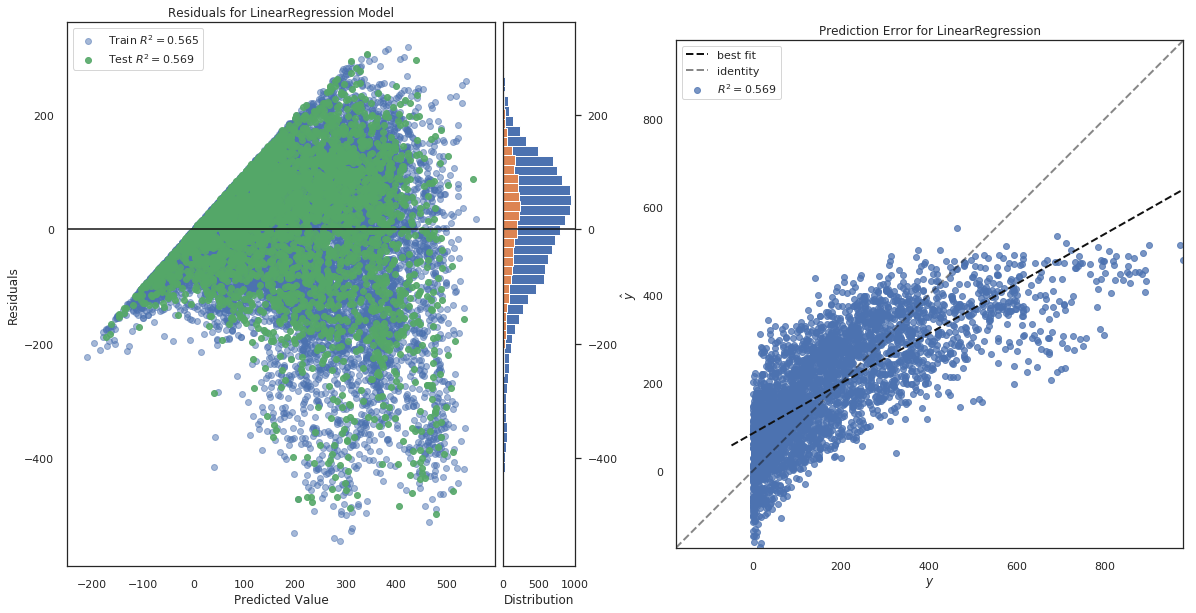

In [6]:
san.regression_sanity_check(regressor, bk_X_train, bk_X_test, bk_y_train, bk_y_test)

> The model is not performing well especially for higher bike count. Residuals error are not completely random around zero yet they have a quasi normal distribution. 
We are already somewhat expecting these results as data set does not meet requirement for linear models. Still, we can grasp some useful findings.

#### Global explanation <a name=lrnoneg>
The following figure explains what happens in the model globally, the global trends and the importance of each feature.  
It's a simple representation of the coefficients in the linear model, the graph represents the magnitude of feature importance and whether they contribute <span style="color:#3572C6">positively</span> to the end result or <span style="color:##C44E52">negatively</span>.

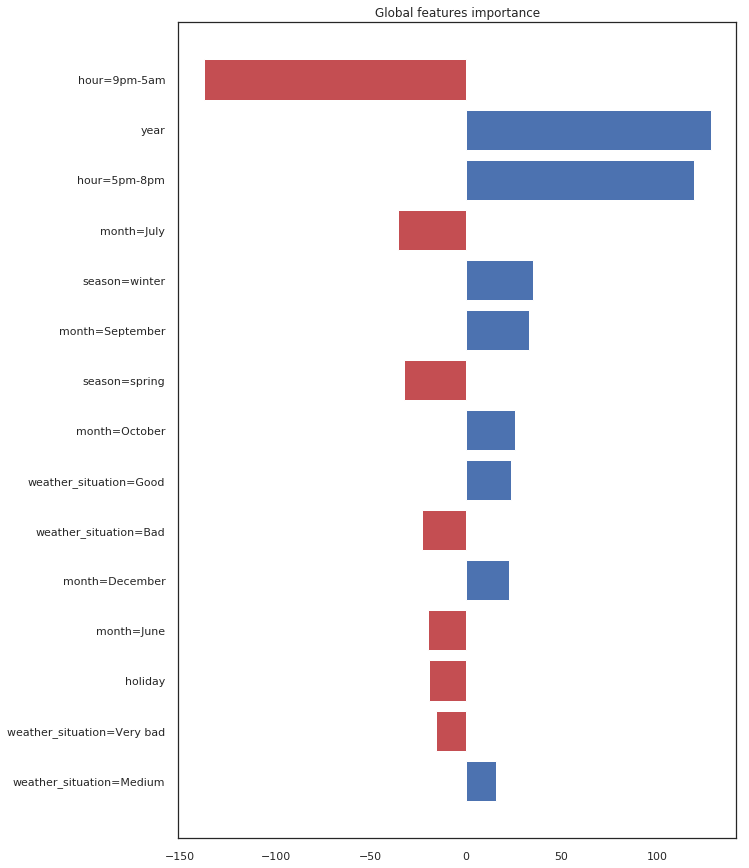

In [7]:
# For more readability we select only 15 features remove selected_ft argument to see all
lmp.global_explanation_plot(bk_X_train.columns, regressor, selected_ft=15)

> Our model mostly learned things that seem logical, night hours decreases bike rentals while year trend, weather situation Good and being in the afternoon rush hour (5pm-8pm) encourages rentals. But we also notice pretty illogical patterns  (winter season contributes positively and spring contributes negatively for example). This allows us to see what's wrong with our model on a logical level after looking at the accuracy or residuals

#### Local explanation <a name=lrnonel>
After looking at global explanations, we would like to understand the specific reasons for a single prediction made by the model. To this intent, we should ask the model for local interpretability. 
For linear models it is straightforward: we examine the estimated regression weights.

In [8]:
sample = bk_X_test.iloc[55]

## recovers the original format just for reading convenience
bikes.data.iloc[[sample.name],:]

,season,year,month,hour,holiday,week_day,working_day,weather_situation,temperature,felt_temperature,humidity,wind_speed,count,days_since_2011
16133,winter,1.0,November,9pm-5am,0.0,Friday,1.0,Good,13.12,16.665,81.0,6.0032,162.0,678.0


The prediction is around 174.42 bikes
Base value (intercept) accounts for 101.28 bikes


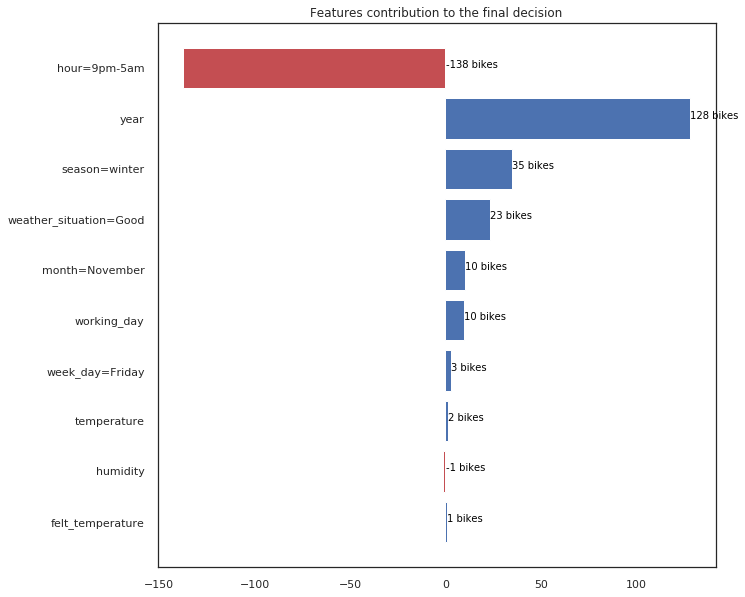

In [9]:
scaled_sample = scaler.transform([sample])[0]

lmp.local_regression_plot(scaled_sample, 
                          regressor=regressor,
                          feature_names=bk_X_test.columns, 
                          target_unity="bikes", 
                          selected_ft=10);

> In this example we used the linear model to predict the bike rentals for a single instance in test sets. The figure above shows for each feature its contribution to the final decision. Feature contribution accounts for feature value: <em>contribution<sub>{feature}</sub> = coefficient<sub>{feature}</sub> * value<sub>{feature}</sub></em> 
> + Local interpretation of a numerical feature 'temperature': given the temperature was 13.12° for this instance, it increases the estimated bikes rentals, on average, by 1 unit, given all other features stay the same.
> + Local interpretation of a categorical feature 'hour_9pm-5am': given the hour is comprised between 9pm and 5am (at night), it decreases the estimated bikes rentals, on average, by -137, compared to other categorical ranges. i.e: [6am-10am, 11am-4pm, 5pm-8pm] and given all other features stay the same.

Now that we have seen how to interpret the linear model decisions we will use two forms of regularized regressions to get more stable interpretations.

Motivations to used regularized models are:
+ When the data set have a huge number of features (possibly hundreds or thousands) plotting coefficients or feature contributions  wouldn't make any sense to a human interpreter. We should shrink unimportant inputs
+ Second, non regularized regressions are very sensitive to colinear and redundante features. 

In the next section, we will use LASSO (L1 penalization) and Ridge (L2 penalization) regression to make interpretations more stable and readable. 

#### Linear regression with lasso penalization <a name=lrlasso>

##### Model creation and sanity checks <a name=lrlassom>

In [10]:
# Model creation
lm_lasso = Lasso(alpha = 5).fit(scaled_bk_X_train, bk_y_train)

Plotting the predicted values against the actual values

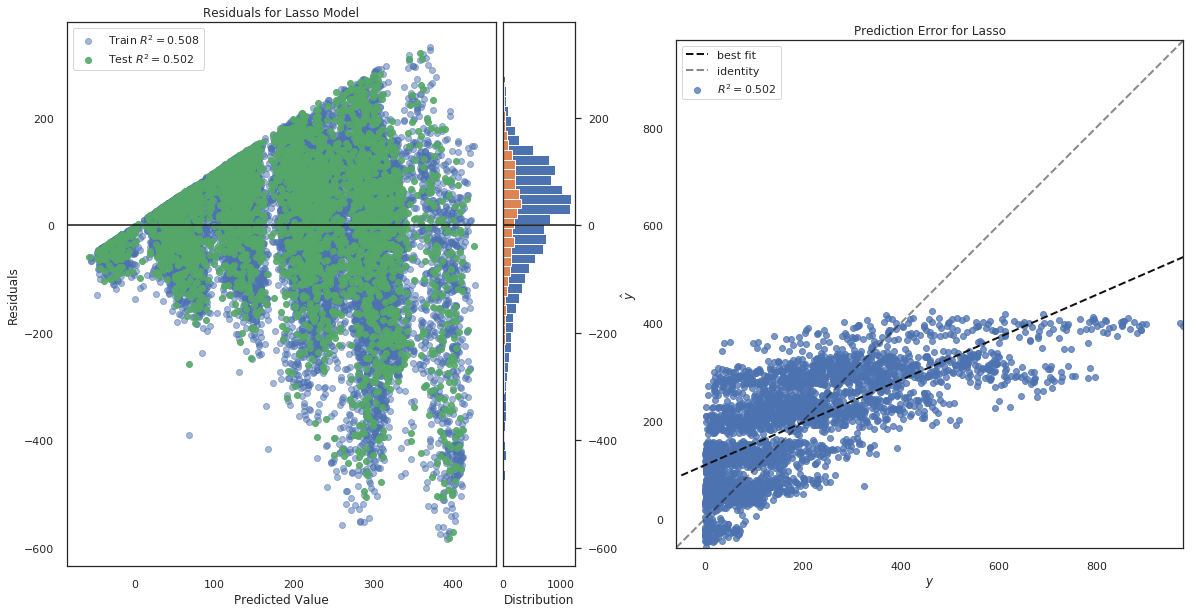

In [11]:
san.regression_sanity_check(lm_lasso, scaled_bk_X_train, scaled_bk_X_test, bk_y_train,bk_y_test)

##### Global explanation <a name=lrlassog>

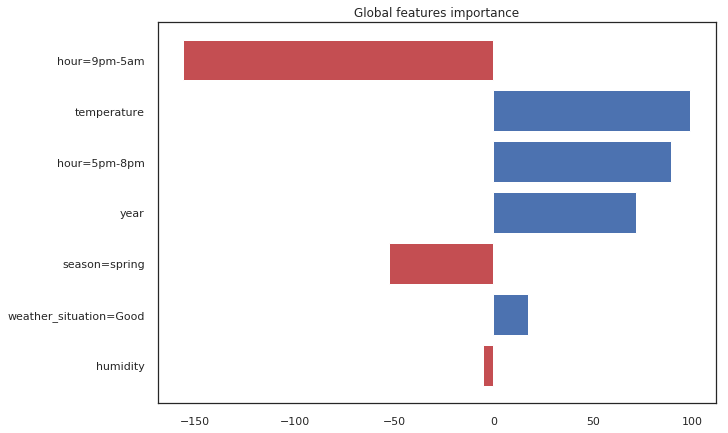

In [12]:
lmp.global_explanation_plot(bk_X_train.columns, lm_lasso)

As we can see Lasso managed to reduce the number of features that have a non zero coefficient 

##### Local explanation <a name=lrlassol>

The prediction is around 113.12 bikes
Base value (intercept) accounts for 154.11 bikes


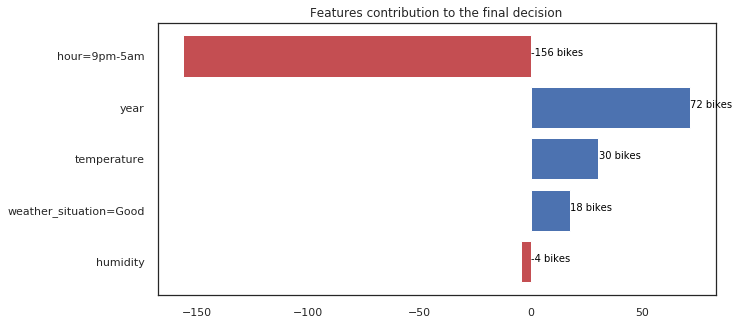

In [13]:
lmp.local_regression_plot(scaled_sample, 
                          feature_names=bk_X_test.columns, 
                          regressor=lm_lasso, 
                          target_unity="bikes");

#### Linear regression with ridge penalization <a name=lrridge>

##### Model creation and sanity checks <a name=lrridgem>

In [14]:
# Model creation
lm_ridge = Ridge(alpha = 10).fit(scaled_bk_X_train, bk_y_train)

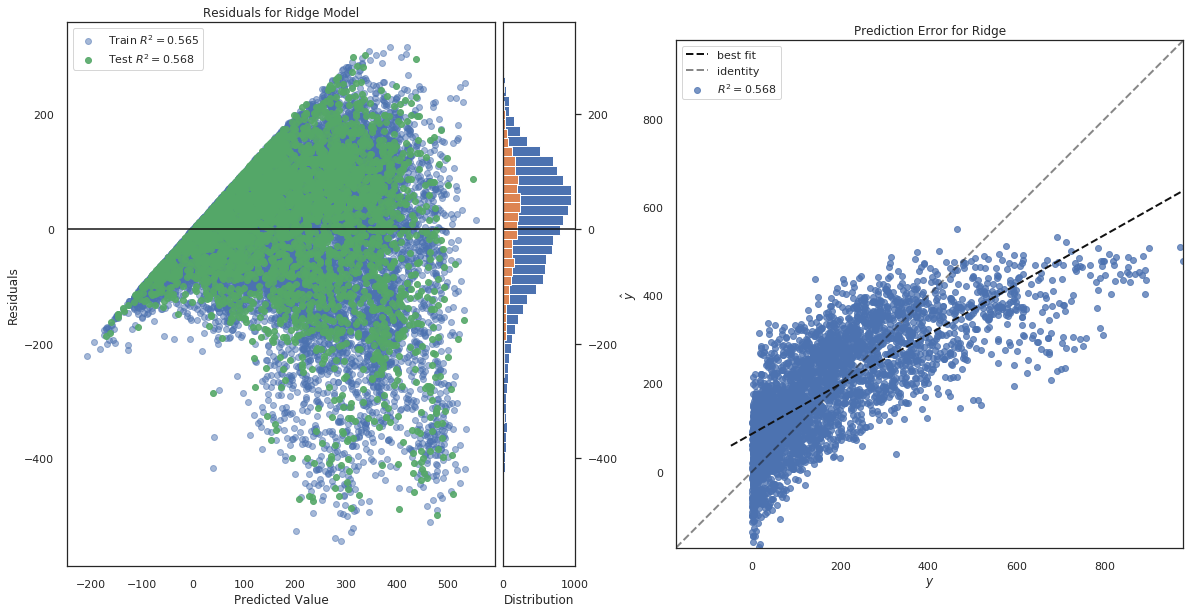

In [15]:
san.regression_sanity_check(lm_ridge, 
                            scaled_bk_X_train, scaled_bk_X_test,
                            bk_y_train, bk_y_test)

##### Global explanation <a name=lrridgeg>

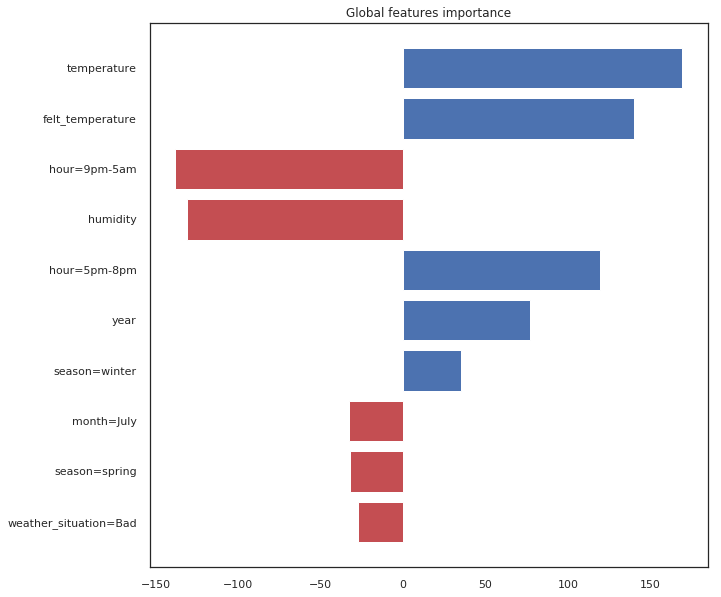

In [16]:
lmp.global_explanation_plot(bk_X_train.columns, lm_ridge, selected_ft=10)

##### Local explanation <a name=lrridgel>

The prediction is around 86.49 bikes
Base value (intercept) accounts for 88.73 bikes


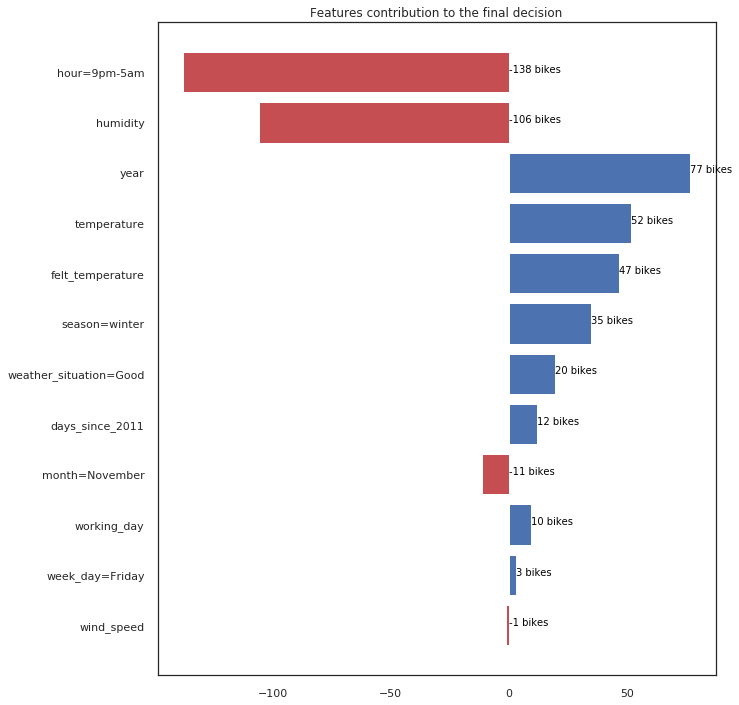

In [17]:
lmp.local_regression_plot(scaled_sample, 
                          feature_names=bk_X_test.columns, 
                          regressor=lm_ridge, 
                          target_unity="bikes");

#### Conclusions <a name=lrc>

* Linear regressions is probably one of the most known interpretable model. The coefficients it produces describe the behavior of the model. These models learn a linear and monotonic functions between features and target. Linearity makes the model interpretable, we can deduce the contribution of a feature by looking at its coefficient in the model.

* Regularized linear models are a powerful set of tool for feature interpretation. Lasso induces sparsity which is useful for feature selection. Ridge, however, is better suited for interpretability due to its stability and the fact that useful features tend to have non-zero coefficients. Lasso on the other hand tend to zero out one of two variables if they happen to be correlated. 


<b>Pros</b>
+ By looking at the coefficients we can get a global idea of what the model is doing for one instance. We can see how much each feature actually contributes to the final result
+ When interpreting models stick to Ridge instead of Lasso or OLS regression
+ It is a "regulator-approvable" model

<b>Cons</b>
+ As its name implies, Linear models can only represent linear relationships
+ So much unrealistic assumptions for real data (Linearity, normality, homoscedasticity, independence, fixed features, and absence of multicollinearity)
+ Linear models are not that easy to interpret when variables are correlated.
+ Coefficients cannot easily be compared if input are not standardized


